# ‘Portugal Bank Marketing Analysis and Prediction’

‘Portugal Bank Marketing’ client data: 

1) age (numeric) 

2) job: type of job(categorical:"admin.","bluecollar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown") 

3) marital: marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)

4) education: education of individual (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown") 

5) default: has credit in default? (categorical: "no","yes","unknown") 

6) housing: has housing loan? (categorical: "no","yes","unknown") 

7) loan: has personal loan? (categorical: "no","yes","unknown") Related with the last contact of the current campaign:

8) contact: contact communication type (categorical: "cellular","telephone") 

9) month: last contact month of year (categorical: "jan", "feb", "mar", …, "nov", "dec") 

10) dayofweek: last contact day of the week (categorical: "mon","tue","wed","thu","fri") 

11) duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

12) campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact) 

13) pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14) previous: number of contacts performed before this campaign and for this client (numeric) 

15) poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")

16) emp.var.rate: employment variation rate - quarterly indicator (numeric) 

17) cons.price.idx: consumer price index - monthly indicator (numeric) 

18) cons.conf.idx: consumer confidence index - monthly indicator (numeric)

19) concavepoints_se: standard error for number of concave portions of the contour 

20) euribor3m: euribor 3 month rate - daily indicator (numeric) 

21) nr.employed: number of employees - quarterly indicator (numeric) Output variable (desired target):

22) y: has the client subscribed a term deposit? (binary: "yes","no")

# Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset to be imported which to be analysed.

In [2]:
df=pd.read_csv("C:\\Users\\VIMAL MADHAN\\Desktop\\pga15 python\\bank.csv")

# Now the dataset will showing all details inform of table by rows and columns

In [3]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


# now we using set_option in pandas to display max columns or rows from the table

In [4]:
pd.set_option('display.max_columns',100)

In [5]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


# Now we are extracting the number of rows and columns in the dataset

In [6]:
df.shape

(41188, 21)

This shows that how much rows and columns are in the dataset

# EXPLORATORY DATA ANALYSIS(EDA)

# Before building the model,first we have to analyse whether there is any missing values in the dataset

In [7]:
df.isna().sum().sum()

0

# Now, it is confirmed that there is no missing or null values in the dataset and we can proceed for further process

# We have to get the basic informations of each and every attributes in our dataset

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

# In this dataset,since many columns are in the form of variables, we have to convert them into numeric form for further analysis

# We have to use labelencoder option 

In [9]:
from sklearn.preprocessing import LabelEncoder
L_B=LabelEncoder()

In [10]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# By using labelencoder we have to convert the string variables into numeric

In [11]:
df['job']=L_B.fit_transform(df['job'])
df['marital']=L_B.fit_transform(df['marital'])
df['education']=L_B.fit_transform(df['education'])
df['default']=L_B.fit_transform(df['default'])
df['housing']=L_B.fit_transform(df['housing'])
df['loan']=L_B.fit_transform(df['loan'])
df['contact']=L_B.fit_transform(df['contact'])
df['month']=L_B.fit_transform(df['month'])
df['day_of_week']=L_B.fit_transform(df['day_of_week'])
df['poutcome']=L_B.fit_transform(df['poutcome'])
df['y']=L_B.fit_transform(df['y'])

In [12]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,261,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,149,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,226,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,151,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,307,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


# Now the every string character variables are converted into numeric

# Descriptive statistics for the given data

In [13]:
df.describe()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,3.72458,1.172769,3.747184,0.208872,1.071720,0.327425,0.365252,4.230868,2.004613,258.285010,2.567593,962.475454,0.172963,0.930101,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,3.59456,0.608902,2.136482,0.406686,0.985314,0.723616,0.481507,2.320025,1.397575,259.279249,2.770014,186.910907,0.494901,0.362886,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,0.00000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,102.000000,1.000000,999.000000,0.000000,1.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,2.00000,1.000000,3.000000,0.000000,2.000000,0.000000,0.000000,4.000000,2.000000,180.000000,2.000000,999.000000,0.000000,1.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,7.00000,2.000000,6.000000,0.000000,2.000000,0.000000,1.000000,6.000000,3.000000,319.000000,3.000000,999.000000,0.000000,1.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,11.00000,3.000000,7.000000,2.000000,2.000000,2.000000,1.000000,9.000000,4.000000,4918.000000,56.000000,999.000000,7.000000,2.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


# CORRELATION comparision between each and every variables

Correlation > 0 = Positive correlation

correlation < 0 = Negative Correlation

correlation == 0 = No correlation

In [14]:
df_corr=df.corr()

In [15]:
df_corr

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
age,1.000000,0.001250,-0.389753,-0.117892,0.164965,-0.001603,-0.007368,0.007021,-0.024877,-0.017572,-0.000866,0.004594,-0.034369,0.024365,0.019750,-0.000371,0.000857,0.129372,0.010767,-0.017725,0.030399
job,0.001250,1.000000,0.027897,0.134121,-0.028277,0.006962,-0.010209,-0.025132,-0.033213,-0.000844,-0.006490,-0.006923,-0.028468,0.020965,0.011504,-0.008271,-0.016017,0.052760,-0.007880,-0.019574,0.025122
marital,-0.389753,0.027897,1.000000,0.109220,-0.079450,0.010467,0.005788,-0.054501,-0.007629,0.002202,0.010290,-0.007240,-0.037942,0.038689,0.001912,-0.084210,-0.057477,-0.033783,-0.091939,-0.086199,0.046203
education,-0.117892,0.134121,0.109220,1.000000,-0.186859,0.016825,0.006384,-0.105726,-0.082684,-0.017986,-0.015102,0.000371,-0.046626,0.038831,0.017009,-0.043778,-0.081607,0.078799,-0.036380,-0.041492,0.057799
default,0.164965,-0.028277,-0.079450,-0.186859,1.000000,-0.015815,-0.003782,0.135238,-0.015830,-0.008701,-0.011794,0.032825,0.080062,-0.102416,0.023417,0.203263,0.168073,0.026522,0.195336,0.189845,-0.099352
housing,-0.001603,0.006962,0.010467,0.016825,-0.015815,1.000000,0.044296,-0.082186,-0.018141,0.003339,-0.007658,-0.011010,-0.010551,0.021314,-0.011783,-0.060196,-0.080504,-0.033845,-0.059277,-0.045862,0.011552
loan,-0.007368,-0.010209,0.005788,0.006384,-0.003782,0.044296,1.000000,-0.008556,-0.005705,-0.009344,-0.000916,0.005166,0.000345,-0.001327,-0.001511,0.001849,-0.002430,-0.012025,0.000125,0.003903,-0.004909
contact,0.007021,-0.025132,-0.054501,-0.105726,0.135238,-0.082186,-0.008556,1.000000,0.276565,-0.009575,-0.026657,0.077368,0.117970,-0.212848,0.118744,0.393584,0.591474,0.251614,0.399773,0.269155,-0.144773
month,-0.024877,-0.033213,-0.007629,-0.082684,-0.015830,-0.018141,-0.005705,0.276565,1.000000,0.027677,0.003690,-0.062059,-0.047891,0.103157,-0.065012,-0.178782,-0.004239,0.009652,-0.117264,-0.221425,-0.006065
day_of_week,-0.017572,-0.000844,0.002202,-0.017986,-0.008701,0.003339,-0.009344,-0.009575,0.027677,1.000000,0.021950,-0.038288,-0.009531,-0.004102,0.018732,0.033245,0.005644,0.041465,0.039043,0.028380,0.015967


# Since when there are lesser attributes it will be convinient for using Heatmap which gives the graphical correlation between each and every attributes

# VISUALIZATION

In [16]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,261,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,149,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,226,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,151,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,307,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


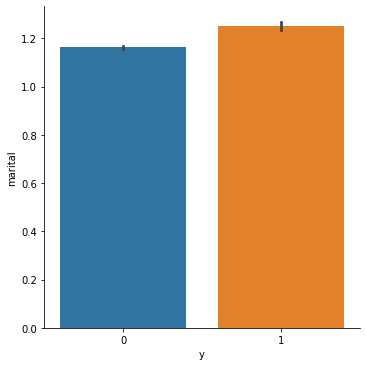

In [179]:
sns.factorplot(x='y',y='marital',data=df,kind='bar')

C:\Users\VIMAL MADHAN\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\VIMAL MADHAN\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='duration', ylabel='Density'>

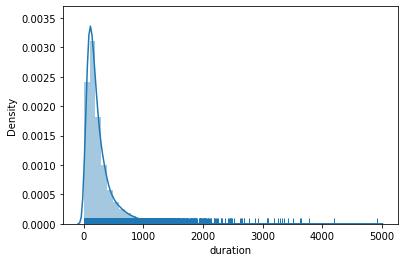

In [186]:
sns.distplot(df['duration'],rug=True)

C:\Users\VIMAL MADHAN\AppData\Roaming\Python\Python37\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


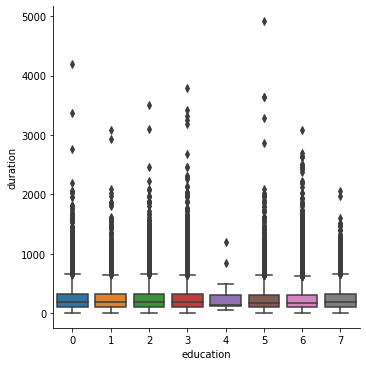

In [191]:
sns.factorplot(x='education',y='duration',data=df,kind='box')

# Now,the dataset given is to analyse the classifications,so we can use following classification methods, 

1.LOGISTIC REGRESSION

2.RANDOM FOREST

3.NAIVE BAYES

4.KNN

5.SVM


# Now we have to separate the independent and dependent variables in the dataset

In [17]:
x_ind=df.drop(['y'],axis=1)


In [18]:
y_dep=df.y

In [19]:
x_ind.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
dtype: int64

In [20]:
y_dep

0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: y, Length: 41188, dtype: int32

# Before building the model,the dataset have to split by means of train and test and train_test_split is used for spliting the dataset

Train_split = 80%

Test_split = 20%

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x_ind,y_dep,test_size=0.2,random_state=5)

Now the dataset is splitted with respect to,

x_train = 80% of independent data

x_test = 20% of independent data

y_train = 80% of dependent data

y_test = 20% of dependent data

# MODEL BUILDING

# LOGISTIC REGRESSION

Logistic regression is mainly used to predict binary classification.

Initially it will be predicting the values of 0 and 1 by default threshold value of 0.5.

To improve the accuracy we have to use ROC curve and to find the threshold value at which state it will gaining maximum accuracy

# To find the p-values we have to use STATSMODELS library and LOGIT function

In [23]:
import statsmodels.api as sm


In [24]:
my_fit=sm.Logit(y_train,x_train)

In [25]:
p_value=my_fit.fit()

Optimization terminated successfully.
         Current function value: 0.210344
         Iterations 8


In [26]:
p_value.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.395     
Dependent Variable: y                AIC:              13901.6746
Date:               2020-12-10 16:14 BIC:              14069.7296
No. Observations:   32950            Log-Likelihood:   -6930.8   
Df Model:           19               LL-Null:          -11465.   
Df Residuals:       32930            LLR p-value:      0.0000    
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     8.0000                                       
-----------------------------------------------------------------
                  Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------
age               0.0054   0.0021   2.5611 0.0104  0.0013  0.0095
job               0.0128   0.0063   2.0402 0.0413  0.0005  0.0250
marital           0.1053   0.0408   2.5825 0.0098  0.0254  0.1851
education         0.0423   0.0111   3.8083 0.0001  0.0205  0.0640
default          -0.4056   0.0741  -5.4723 0.0000 -0.5509 -0.2603
housing          -0.0009   0.0229  -0.0372 0.9703 -0.0458  0.0441
loan             -0.0200   0.0315  -0.6354 0.5251 -0.0817  0.0417
contact          -0.6961   0.0669 -10.4084 0.0000 -0.8272 -0.5650
month            -0.1147   0.0094 -12.2242 0.0000 -0.1331 -0.0963
day_of_week       0.0695   0.0164   4.2467 0.0000  0.0374  0.1016
duration          0.0045   0.0001  56.0983 0.0000  0.0044  0.0047
campaign         -0.0426   0.0131  -3.2449 0.0012 -0.0683 -0.0169
pdays            -0.0009   0.0002  -5.3510 0.0000 -0.0013 -0.0006
previous         -0.0773   0.0617  -1.2526 0.2103 -0.1983  0.0437
poutcome          0.5179   0.0852   6.0772 0.0000  0.3509  0.6849
emp.var.rate     -0.9127   0.0710 -12.8570 0.0000 -1.0518 -0.7735
cons.price.idx    0.6995   0.0345  20.2984 0.0000  0.6320  0.7671
cons.conf.idx     0.0191   0.0050   3.8126 0.0001  0.0093  0.0289
euribor3m         0.6612   0.0823   8.0294 0.0000  0.4998  0.8226
nr.employed      -0.0137   0.0007 -20.1707 0.0000 -0.0150 -0.0123
=================================================================

"""

# From this summary we have to find that which variables are significant or not,when the variables are not significant for 5% level of significance we have to drop that column and compare AIC value of te particular column with overall column.when overall < individual AIC we should not drop the column and when vice versa we have to drop the column and can have  the clearnce upto 2% level.

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x_ind,y_dep,test_size=0.2,random_state=5)
x_train.drop('housing',inplace=True,axis=1)
my_fit=sm.Logit(y_train,x_train)
p_value=my_fit.fit()
p_value.summary2()


C:\Users\VIMAL MADHAN\AppData\Roaming\Python\Python37\site-packages\pandas\core\frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Optimization terminated successfully.
         Current function value: 0.210344
         Iterations 8


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.395     
Dependent Variable: y                AIC:              13899.6760
Date:               2020-12-10 16:14 BIC:              14059.3282
No. Observations:   32950            Log-Likelihood:   -6930.8   
Df Model:           18               LL-Null:          -11465.   
Df Residuals:       32931            LLR p-value:      0.0000    
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     8.0000                                       
-----------------------------------------------------------------
                  Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------
age               0.0054   0.0021   2.5609 0.0104  0.0013  0.0095
job               0.0128   0.0063   2.0401 0.0413  0.0005  0.0250
marital           0.1052   0.0408   2.5824 0.0098  0.0254  0.1851
education         0.0423   0.0111   3.8082 0.0001  0.0205  0.0640
default          -0.4056   0.0741  -5.4723 0.0000 -0.5508 -0.2603
loan             -0.0201   0.0315  -0.6375 0.5238 -0.0817  0.0416
contact          -0.6960   0.0668 -10.4144 0.0000 -0.8270 -0.5650
month            -0.1147   0.0094 -12.2242 0.0000 -0.1331 -0.0963
day_of_week       0.0695   0.0164   4.2466 0.0000  0.0374  0.1016
duration          0.0045   0.0001  56.1040 0.0000  0.0044  0.0047
campaign         -0.0426   0.0131  -3.2450 0.0012 -0.0683 -0.0169
pdays            -0.0009   0.0002  -5.3520 0.0000 -0.0013 -0.0006
previous         -0.0773   0.0617  -1.2528 0.2103 -0.1984  0.0437
poutcome          0.5178   0.0852   6.0773 0.0000  0.3508  0.6849
emp.var.rate     -0.9126   0.0710 -12.8574 0.0000 -1.0517 -0.7735
cons.price.idx    0.6995   0.0345  20.2985 0.0000  0.6320  0.7671
cons.conf.idx     0.0191   0.0050   3.8145 0.0001  0.0093  0.0289
euribor3m         0.6612   0.0823   8.0294 0.0000  0.4998  0.8226
nr.employed      -0.0137   0.0007 -20.1708 0.0000 -0.0150 -0.0123
=================================================================

"""

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x_ind,y_dep,test_size=0.2,random_state=5)
x_train.drop('loan',inplace=True,axis=1)
my_fit=sm.Logit(y_train,x_train)
p_value=my_fit.fit()
p_value.summary2()

Optimization terminated successfully.
         Current function value: 0.210350
         Iterations 8


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.395     
Dependent Variable: y                AIC:              13900.0801
Date:               2020-12-10 16:14 BIC:              14059.7322
No. Observations:   32950            Log-Likelihood:   -6931.0   
Df Model:           18               LL-Null:          -11465.   
Df Residuals:       32931            LLR p-value:      0.0000    
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     8.0000                                       
-----------------------------------------------------------------
                  Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------
age               0.0054   0.0021   2.5665 0.0103  0.0013  0.0095
job               0.0128   0.0063   2.0437 0.0410  0.0005  0.0250
marital           0.1054   0.0408   2.5871 0.0097  0.0256  0.1853
education         0.0422   0.0111   3.8052 0.0001  0.0205  0.0640
default          -0.4051   0.0741  -5.4651 0.0000 -0.5503 -0.2598
housing          -0.0015   0.0229  -0.0633 0.9495 -0.0464  0.0435
contact          -0.6959   0.0669 -10.4053 0.0000 -0.8270 -0.5648
month            -0.1146   0.0094 -12.2221 0.0000 -0.1330 -0.0963
day_of_week       0.0695   0.0164   4.2433 0.0000  0.0374  0.1016
duration          0.0045   0.0001  56.0964 0.0000  0.0044  0.0047
campaign         -0.0427   0.0131  -3.2534 0.0011 -0.0684 -0.0170
pdays            -0.0009   0.0002  -5.3453 0.0000 -0.0013 -0.0006
previous         -0.0773   0.0618  -1.2523 0.2105 -0.1984  0.0437
poutcome          0.5181   0.0852   6.0788 0.0000  0.3511  0.6852
emp.var.rate     -0.9129   0.0710 -12.8606 0.0000 -1.0520 -0.7738
cons.price.idx    0.6997   0.0345  20.3036 0.0000  0.6321  0.7672
cons.conf.idx     0.0191   0.0050   3.8148 0.0001  0.0093  0.0289
euribor3m         0.6615   0.0823   8.0328 0.0000  0.5001  0.8229
nr.employed      -0.0137   0.0007 -20.1778 0.0000 -0.0150 -0.0123
=================================================================

"""

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x_ind,y_dep,test_size=0.2,random_state=5)
x_train.drop('previous',inplace=True,axis=1)
my_fit=sm.Logit(y_train,x_train)
p_value=my_fit.fit()
p_value.summary2()

Optimization terminated successfully.
         Current function value: 0.210368
         Iterations 8


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.395     
Dependent Variable: y                AIC:              13901.2359
Date:               2020-12-10 16:14 BIC:              14060.8881
No. Observations:   32950            Log-Likelihood:   -6931.6   
Df Model:           18               LL-Null:          -11465.   
Df Residuals:       32931            LLR p-value:      0.0000    
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     8.0000                                       
-----------------------------------------------------------------
                  Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------
age               0.0054   0.0021   2.5430 0.0110  0.0012  0.0095
job               0.0127   0.0063   2.0330 0.0421  0.0005  0.0250
marital           0.1054   0.0408   2.5852 0.0097  0.0255  0.1853
education         0.0421   0.0111   3.7912 0.0001  0.0203  0.0638
default          -0.4055   0.0741  -5.4712 0.0000 -0.5508 -0.2603
housing          -0.0010   0.0229  -0.0418 0.9666 -0.0459  0.0440
loan             -0.0200   0.0315  -0.6348 0.5256 -0.0817  0.0417
contact          -0.6899   0.0667 -10.3463 0.0000 -0.8206 -0.5592
month            -0.1149   0.0094 -12.2544 0.0000 -0.1333 -0.0965
day_of_week       0.0691   0.0164   4.2234 0.0000  0.0371  0.1012
duration          0.0045   0.0001  56.1054 0.0000  0.0044  0.0047
campaign         -0.0424   0.0131  -3.2309 0.0012 -0.0681 -0.0167
pdays            -0.0008   0.0001  -7.4658 0.0000 -0.0010 -0.0006
poutcome          0.5933   0.0606   9.7836 0.0000  0.4744  0.7121
emp.var.rate     -0.9169   0.0709 -12.9337 0.0000 -1.0559 -0.7780
cons.price.idx    0.6916   0.0339  20.4194 0.0000  0.6252  0.7580
cons.conf.idx     0.0189   0.0050   3.7744 0.0002  0.0091  0.0287
euribor3m         0.6637   0.0823   8.0627 0.0000  0.5024  0.8251
nr.employed      -0.0136   0.0007 -20.1524 0.0000 -0.0149 -0.0122
=================================================================

"""

# Since every AIC values are at 2% clearance level so we no need to drop those columns

In [37]:
x_train,x_test,y_train,y_test=train_test_split(x_ind,y_dep,test_size=0.2,random_state=5)


In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
model_lr=LogisticRegression()
model_lr_fit=model_lr.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [40]:
y_pred_lr=model_lr_fit.predict(x_test)

In [41]:
y_pred_lr

array([0, 0, 0, ..., 0, 0, 0])

In [42]:
# To find the accuracy and the errors we have to import confusion_matrix and accuracy_score

In [43]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [44]:
confusion_matrix(y_test,y_pred_lr)

array([[7066,  179],
       [ 616,  377]], dtype=int64)

In [46]:
acc_lr=accuracy_score(y_test,y_pred_lr)

In [47]:
print('The accuracy score for Logistic regression model using gini method :',acc_lr*100)

The accuracy score for Logistic regression model using gini method : 90.3495994173343


# ROC curve

In [49]:
from sklearn import metrics

In [50]:
y_pred_prob=model_lr.predict_proba(x_test)[:,1]
fpr,tpr,_=metrics.roc_curve(y_test,y_pred_prob)

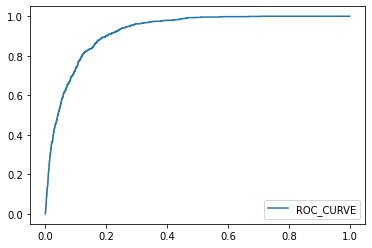

In [51]:
plt.plot(fpr,tpr,label='ROC_CURVE')
plt.legend()

In [52]:
update_roc=LogisticRegression(class_weight='balanced')
update_roc.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [53]:
thr=np.where(update_roc.predict_proba(x_test)[:,1]>0.82,1,0)

In [56]:
acc_log=accuracy_score(y_test,thr)

In [57]:
print('The accuracy_score for Logistic regression using ROC curve is :',acc_log*100)

The accuracy_score for Logistic regression using ROC curve is : 90.30104394270454


# NAIVE BAYES

This model is based on bayes theorom

this model will gives the accuracy based on individual probability

This model is used only for classification

In [59]:
from sklearn.naive_bayes import GaussianNB

In [62]:
model_nb=GaussianNB()
model_nb.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

This works based on Gaussian or normal distribution

In [63]:
y_pred_nb=model_nb.predict(x_test)

In [64]:
confusion_matrix(y_test,y_pred_nb)

array([[6380,  865],
       [ 415,  578]], dtype=int64)

In [65]:
acc_nb=accuracy_score(y_test,y_pred_nb)

In [66]:
print('The accuracy score for Naive Bayes model is :',acc_nb*100)

The accuracy score for Naive Bayes model is : 84.46224811847536


# RANDOM FOREST

It is used for both classification and Regression analysis

Random forest can have many number of trees and it is predicted by means of GINI or ENTROPY

Both GINI and ENTROPY methods are used to minimize the impurities

In [71]:
from sklearn.ensemble import RandomForestClassifier

# criteria = GINI

In [72]:
model_rf=RandomForestClassifier(n_estimators=5,random_state=5)

In [73]:
model_rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=5, verbose=0,
                       warm_start=False)

In [74]:
y_pred_rf=model_rf.predict(x_test)

In [75]:
y_pred_rf

array([0, 0, 0, ..., 0, 0, 0])

# To find the accuracy and the errors we have to import confusion_matrix and accuracy_score

In [76]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [77]:
confusion_matrix(y_test,y_pred_rf)

array([[6940,  305],
       [ 509,  484]], dtype=int64)

In [78]:
acc_rf=accuracy_score(y_test,y_pred_rf)

# Accuracy score using GINI in RANDOMFOREST

In [79]:
print('The accuracy score for random forest model using gini method :',acc_rf*100)

The accuracy score for random forest model using gini method : 90.11896091284292


# HYPER PARAMETERS

We have to import Randomized search cv library to find the hyper parameters

In [80]:
from sklearn.model_selection import RandomizedSearchCV

In [81]:
parameters={'n_estimators':(100,200,300,400,800),'criterion':('gini','entropy'),
           'max_features':('sqrt','log2'),'min_samples_split':(2,4,6,8)}

In [82]:
rf_grid=RandomizedSearchCV(RandomForestClassifier(),param_distributions=parameters,cv=5)

In [84]:
rf_grid.fit(x_train,y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [85]:
rf_grid.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [86]:
best_model=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [87]:
best_model.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [88]:
y_pred_rfhp=best_model.predict(x_test)

In [89]:
confusion_matrix(y_test,y_pred_rfhp)

array([[7015,  230],
       [ 522,  471]], dtype=int64)

In [90]:
acc_rf_hp=accuracy_score(y_test,y_pred_rfhp)

In [91]:
print('The accuracy of Random forest model using hyperparameters :',acc_rf_hp*100)

The accuracy of Random forest model using hyperparameters : 90.87157076960428


# KNEIGHBORS CLASSIFIER

KNN is mainly used to find the correct category to which the output have to fall in the particular category

TWO METHODS IN KNN:

1.Square Root 

2.Error method

# From sklearn importing the kneighbors classifier model

In [92]:
from sklearn.neighbors import KNeighborsClassifier

# WE have to normalize the X_train and x_test values using standard scalar to get the values within the range and to avoid the spread

In [103]:
from sklearn.preprocessing import StandardScaler

In [104]:
norm=StandardScaler()

In [105]:
x_train1=norm.fit_transform(x_train)
x_test1=norm.fit_transform(x_test)

# SQUARE ROOT METHOD

In [107]:
(x_train1.shape[0])**(0.5)

181.52134860671347

# The square root of x_train rows should be used in n_neighbors for square root method

In [108]:
mod_knn=KNeighborsClassifier(n_neighbors=181 ,p=2,metric='euclidean')
mod_knn.fit(x_train1,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=181, p=2,
                     weights='uniform')

In [110]:
y_pred_knnsq=mod_knn.predict(x_test1)

In [111]:
confusion_matrix(y_test,y_pred_knnsq)

array([[7160,   85],
       [ 758,  235]], dtype=int64)

In [112]:
acc_knnsq=accuracy_score(y_test,y_pred_knnsq)

In [113]:
print('The accuracy score of KNN model using Square method is :',(acc_knnsq)*100)

The accuracy score of KNN model using Square method is : 89.76693372177714


# ERROR METHOD

In [192]:
error_pred=[]
for i in range (1,25):
    knn_new=KNeighborsClassifier(n_neighbors=i)
    knn_new.fit(x_train1,y_train)
    y_pred_knnerr=knn_new.predict(x_test1)
    error_pred.append(np.mean(y_test != y_pred_knnerr))

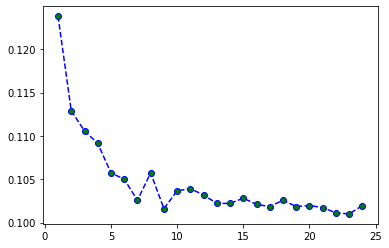

In [193]:
plt.plot(range(1,25),error_pred,color='Blue',markerfacecolor='Green',marker='o',linestyle='dashed')

In [203]:
mod_knn_err=KNeighborsClassifier(n_neighbors=23 ,p=2,metric='euclidean')
mod_knn_err.fit(x_train1,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=23, p=2,
                     weights='uniform')

In [204]:
y_pred_knnerr=mod_knn.predict(x_test1)

In [205]:
confusion_matrix(y_test,y_pred_knnerr)

array([[7160,   85],
       [ 758,  235]], dtype=int64)

In [206]:
acc_knnsq=accuracy_score(y_test,y_pred_knnerr)

In [207]:
print('The accuracy score of KNN model using error method is :',(acc_knnsq)*100)

The accuracy score of KNN model using error method is : 89.76693372177714


# SUPPORT VECTOR MACHINE

It is used to find the correct category for which the values to be predicted.

It is used only for classification

It will be prediction using margin and data points

In [117]:
from sklearn.svm import SVC

In [118]:
model_svm=SVC(kernel='linear')
model_svm.fit(x_train1,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [119]:
model_svm.n_support_

array([3294, 3283])

In [120]:
y_pred_svm = model_svm.predict(x_test)

In [121]:
confusion_matrix(y_test,y_pred_svm)

array([[7242,    3],
       [ 990,    3]], dtype=int64)

In [122]:
acc_svm=accuracy_score(y_test,y_pred_svm)

In [123]:
print('The accuracy score for SVM is :', acc_svm)

The accuracy score for SVM is : 0.8794610342316096


# Ensembling -VOTING CLASSIFIER

In [129]:
model1 = LogisticRegression()
model2 = RandomForestClassifier()
model3 = GaussianNB()
model4 = KNeighborsClassifier()
model5 = SVC()

In [130]:
model1.fit(x_train,y_train)
model2.fit(x_train,y_train)
model3.fit(x_train,y_train)
model4.fit(x_train,y_train)
model5.fit(x_train,y_train)



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [131]:
pred1=model1.predict(x_test)
pred2=model1.predict(x_test)
pred3=model1.predict(x_test)
pred4=model1.predict(x_test)
pred5=model1.predict(x_test)

In [160]:
import statistics as st
final_predict=np.array([])
for i in range(0,len(x_test)):
    final_predict=np.append(final_predict,st.mode([pred1[i],pred2[i],pred3[i],pred4[i],pred5[i]]))

In [161]:
final_predict=pd.DataFrame(final_predict)

In [162]:
x_test.shape

(8238, 20)

In [163]:
y_test.shape

(8238,)

In [164]:
final_predict.shape

(8238, 1)

In [165]:
confusion_matrix(y_test,final_predict)

array([[7066,  179],
       [ 616,  377]], dtype=int64)

In [166]:
acc_vc=accuracy_score(y_test,final_predict)

In [167]:
print('The accuracy score for voting classifier emsembling :',acc_vc*100)

The accuracy score for voting classifier emsembling : 90.3495994173343


# MAXIMUM ACCURACY

In [172]:
accuracy = pd.DataFrame({'model':['Logistic_Regression','Naive_Bayes','Random_Forest','KNN','SVM'],
                        'accuracy_score':[acc_log,acc_nb,acc_rf_hp,acc_knnsq,acc_svm]})

In [173]:
accuracy

,model,accuracy_score
0,Logistic_Regression,0.903010
1,Naive_Bayes,0.844622
2,Random_Forest,0.908716
3,KNN,0.897669
4,SVM,0.879461


# Conclusion

From this client dataset some machine learning classification techniques are used such as 
Logistic Regression,Naive Bayes,Random Forest,KNN,SVM.

Finally the accuracy score for every method is analysed.since,for this analysis Random Forest having the maximum Accuracy score of 90%
and this method can be recommended for the prediction for this dataset.

An ensemble method of Voting Classifier is also used to increase the accuracy for the model.

In [3]:
import jovian

<IPython.core.display.Javascript object>

In [4]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: ········
[jovian] Uploading notebook..
[jovian] Capturing environment..


[jovian] Error: Failed to read Anaconda environment using command: "conda env export -n base --no-builds"


[jovian] Committed successfully! https://jovian.ai/vimalmadhan218-v2/supervised-assesment-vimal


'https://jovian.ai/vimalmadhan218-v2/supervised-assesment-vimal'